<a href="https://colab.research.google.com/github/CarlosQuark/Machine-Learning-Astrophysics/blob/main/Imagenes_Sobre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# REDES CONVULSIONALES

from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy
import matplotlib.pyplot as plt
from keras.optimizers import Adam


In [4]:
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()

In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
#Vamos a convertirlo en un vector 764

xtrain = xtrain.reshape(60000,784)
xtest = xtest.reshape(10000,784)


In [7]:
xtrain.shape

(60000, 784)

In [8]:
xtest.shape

(10000, 784)

In [9]:
#Convertir también las etiquetas a categoricas

ytrain = to_categorical(ytrain)

ytest = to_categorical(ytest)

In [10]:
#Armar la red


network = Sequential([

      Dense(units = 512, activation="relu", input_dim = 784),
      Dense(units = 256, activation ="relu"),
      Dense(units = 128, activation = "relu"),
      Dense(units =64, activation = "relu"),
      Dense(units = 10, activation = "softmax")
])

#También podemos utilizar el optimiZador adamax
network.compile(optimizer= "Adamax",
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])



In [11]:
network.summary() #Para ver como se ve la red

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575050 (2.19 MB)
Trainable params: 575050 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Sala de entranamiento

network.fit(xtrain, ytrain, batch_size = 32, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 21s 10ms/step - loss: 0.8506 - accuracy: 0.8784
Epoch 2/100
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2097 - accuracy: 0.9438
Epoch 3/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1239 - accuracy: 0.9636
Epoch 4/100
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0766 - accuracy: 0.9765
Epoch 5/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0536 - accuracy: 0.9838
Epoch 6/100
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0375 - accuracy: 0.9882
Epoch 7/100
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0268 - accuracy: 0.9914
Epoch 8/100
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0209 - accuracy: 0.9931
Epoch 9/100
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0164 - accuracy: 0.9945
Epoch 10/100
1875/1875 [==============================]

In [13]:
network.evaluate(xtest, ytest, batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 0.2848 - accuracy: 0.9806


[0.284839391708374, 0.9805999994277954]

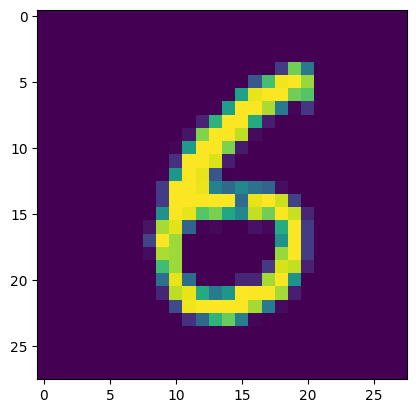

In [14]:
sample_image = xtest[457, :]

plt.figure(1)
plt.imshow(sample_image.reshape(28,28))

In [15]:
y_hat = network.predict(sample_image.reshape(1,784))

1/1 [==============================] - 0s 173ms/step


In [16]:
print(numpy.argmax(y_hat))

6


In [21]:
print(y_hat)

[[9.1503270e-25 1.4254769e-32 5.0358018e-31 8.4817108e-31 1.6662395e-25
  7.2108160e-15 1.0000000e+00 0.0000000e+00 1.2380907e-21 3.5532102e-25]]


In [23]:
#Guardar nuestro modelo


network.save("digista_network_12")

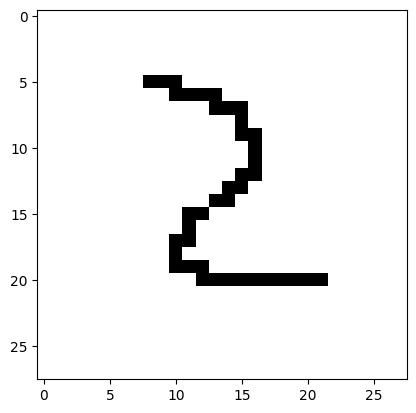

In [25]:
import matplotlib.pyplot as plt

from keras.models import load_model

image = plt.imread("/content/2.png")


plt.imshow(image)

In [26]:
image.shape #Red,green,blue

(28, 28, 3)

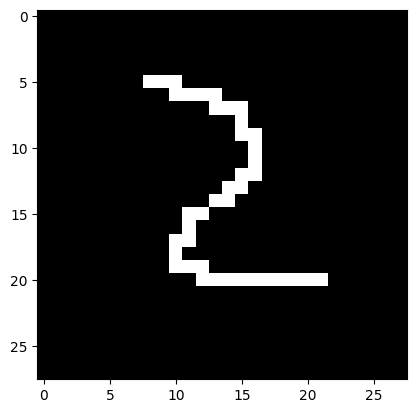

In [29]:
plt.imshow(image[:,:,2], cmap = "binary")

In [43]:
# Para convertir de color a blanco y negro


import cv2

from PIL import Image, ImageOps


bw_image = Image.open("/content/2.png")
inv_image = ImageOps.invert(bw_image)
inv_image = inv_image.convert("L")
print(inv_image)

<PIL.Image.Image image mode=L size=28x28 at 0x7FF5CF7FB640>


In [46]:
# Requiero quw me imagen se convierta en un vector

bw_image = np.array(inv_image).reshape(1,784) / 255.00

In [47]:
network = load_model("digista_network_100")

In [48]:
pred = network.predict(bw_image)

1/1 [==============================] - 0s 70ms/step


In [49]:
import numpy as np

print(np.argmax(pred))

2
